### Visualize generated colors

In [1]:
# Adding parent directory
import sys
sys.path.append('../')

In [2]:
# -*- coding: utf-8 -*-
import os

# Import TensorFlow >= 1.10 and enable eager execution
import tensorflow as tf
# Note: Once you enable eager execution, it cannot be disabled. 
tf.enable_eager_execution()

import datasources
import models
from learning.trainer import Trainer

from utils.args import parser


text_path = '../datasets/colors/colors.txt'
ds = datasources.load(text_path, ds_name='sentences', max_length=40)
model = models.load(ds.vocab_size)

checkpoint_prefix = os.path.splitext(os.path.basename(text_path))[0]
trainer = Trainer(datasource=ds, model=model, optimizer=tf.train.AdamOptimizer(),
                  checkpoint_dir='../pretrained_models/', checkpoint_prefix=checkpoint_prefix)

trainer.restore_last_checkpoint()

Using CuDNNGRU


In [108]:
import string
import matplotlib.pyplot as plt
import random

def get_rgb(output):
    try:
        x = list(map(int, output.split()[-3:]))
        data = [[x]]
        if len(x) != 3:
            return None
        else:
            return data
    except:
        return None

def plot(repeat=10, temperature=1.0, num_char_generate=40, figsize=20, nrows=5):
    ncols = int(repeat/nrows)
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, sharey=True, sharex=True)
    fig.set_figheight(figsize)
    fig.set_figwidth(figsize)
    
    for i in range(nrows):
        for j in range(ncols):
            data = None
            while data is None:
                start_string = random.choice(string.ascii_lowercase)
                generated_text = trainer.sample(num_char_generate=num_char_generate, start_string=start_string,
                                                temperature=temperature)
                data = get_rgb(generated_text)
            ax[i][j].imshow(data)
            ax[i][j].set_title(generated_text, fontsize=24)

    plt.subplots_adjust(hspace=0.5)
    plt.savefig('colors.png')
    plt.show()

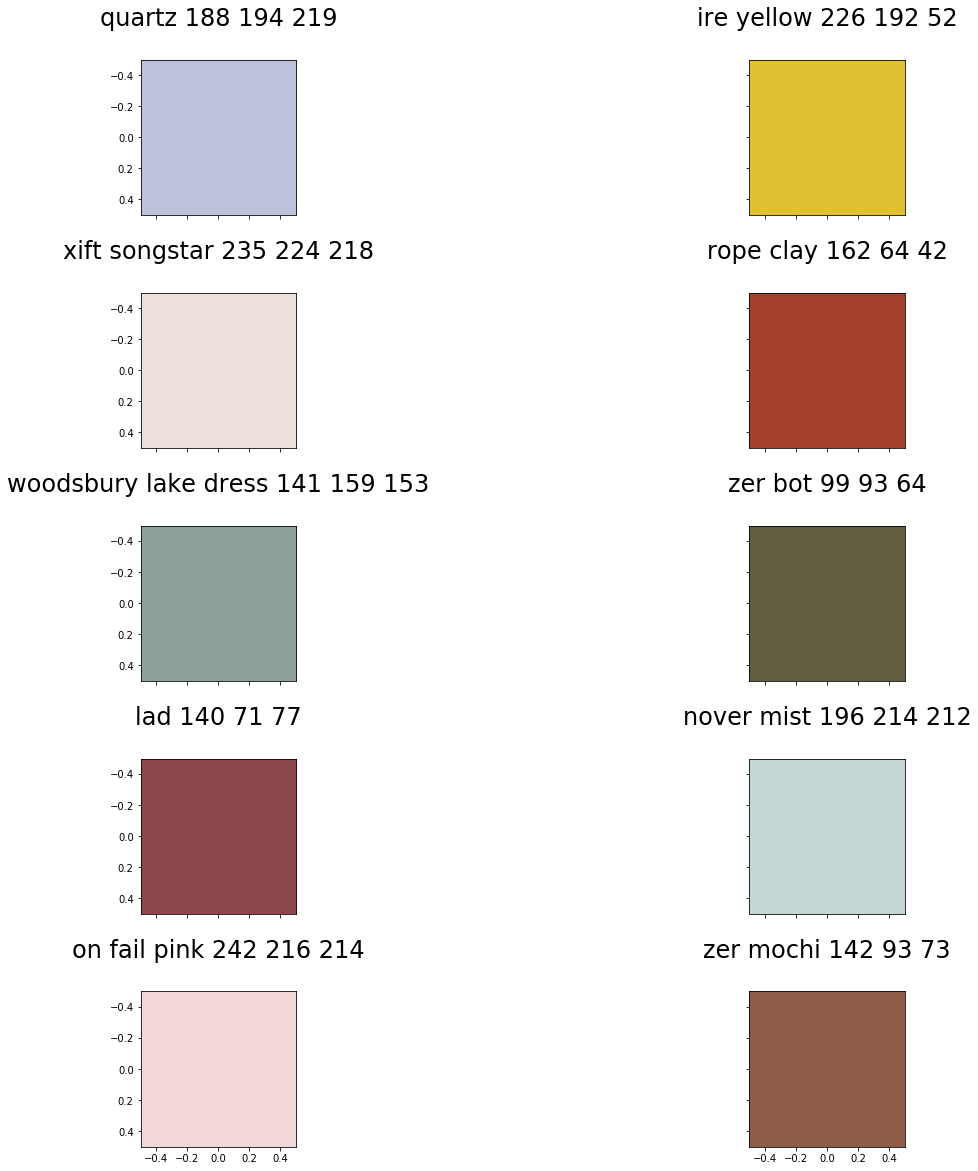

In [109]:
plot()